# Topic: 線性回歸(PM2.5) :Linear Regression on pm2.5 

## Step 1 得到資料: Get Data

In [1]:
#載入所需套件
import pandas as pd#熊貓是python的excel
import matplotlib.pyplot as plt# 視覺化繪製
#我們的開發環境是 Jupyter Notebook，這個指令可以讓圖形不會在新視窗呈現。
%matplotlib inline

#讀入csv文字檔
data=pd.read_csv('training_good.csv')
data2=pd.read_csv('training_bad.csv')
test=pd.read_csv("testing.csv")

'''
print(type(data.head(10)))#<class 'pandas.core.frame.DataFrame'>
print(data.columns)#Index(['x', 'y'], dtype='object')
print(data.info)#<bound method DataFrame.info of       x     y
print(data.describe)#<bound method NDFrame.describe of       x     y
data.head(10)
plt.plot(data.x,data.y)#繪製
print(data2)
'''
#只擷取需要的x和y欄位
data=data[['x','y']]
data2=data2[['x','y']]
#print(data.head())

## Step 2 處理資料: Prepare X, Y(目標格式: ndarray (n,1))

In [2]:
#2d array剝皮68個數變nd array,排向量
x=data.x.values.reshape(-1,1)
y=data.y.values.reshape(-1,1)

'''
print(data.x.values,type(data.x.values))#<class 'numpy.ndarray'>
print(data.x.values.reshape(-1,1),type(data.x.values.reshape(-1,1)))#<class 'numpy.ndarray'>
'''
#2d array剝皮68個數變nd array,排向量
x2=data2.x.values.reshape(-1,1)
y2=data2.y.values.reshape(-1,1)
#print(type(x2),x2.shape)#<class 'numpy.ndarray'> (68, 1)

#要預測的只有x沒有y
testx = test['x'].values.reshape(-1,1)

## Step 3 建立線性迴歸分析模型:  Model training

In [3]:
#Python 機器學習套件 scikit-learn
#使用 sklearn.linear_model 的 LinearRegression() 線性迴歸方法
from sklearn.linear_model import LinearRegression as LR  # 線性迴歸
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#模型初始化
model=LR()

#訓練用fit
model.fit(x,y)

#模型初始化
model2=LR()

#訓練用fit
model2.fit(x2,y2)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5 利用訓練好的模型預測資料: Model Predict New Data

[[5.]] [56.]


<function matplotlib.pyplot.show(*args, **kw)>

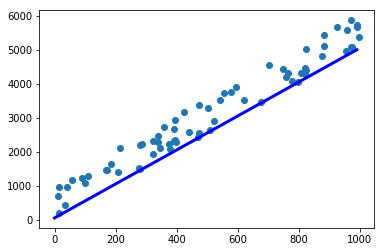

In [4]:
#.predict預測
#用好的資料訓練的model
testy=model.predict(testx)

#把預測的值寫進y欄位
test['y']=testy

'''
#用壞的資料
testy2=model2.predict(testx)
#把預測的值寫進y欄位
test['y']=testy2
'''

a=float(model.coef_)#斜率
b=float(model.intercept_)#截距
print(model.coef_,model.intercept_);#[[5.]] [56.]

_x=[]
_y=[]
import numpy as np
for  i in range(0,1000,10):
    _x.append(i)
    _y.append(a*i+b)

plt.scatter(x2,y2)
plt.plot(_x,_y,color='blue',linewidth=3)
plt.show



## Step 4 評估模型: Evaluate Model

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

testy=model.predict(testx)
#透過.score方法返回判定係數評估模型好不好(1較好)
score=model.score(x,y)

print('score:',score)#1.0
print('mse=',mean_squared_error(testy,y))
print('r2=',r2_score(testy,y))

score2=model2.score(x2,y2)
print('score2:',score2)#0.9591019798799569

score: 1.0
mse= 5196632.720588235
r2= -1.0255341217260443
score2: 0.9591019798799569


In [6]:
# 視覺化資料plot data

'''
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y,  color='blue')
plt.plot(x, testy, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()
'''

"\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.scatter(x, y,  color='blue')\nplt.plot(x, testy, color='red', linewidth=2)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n"

## (optional) Step 6 把預測資料寫進檔案: Write Back

In [7]:
test.to_csv('predict_result.csv',index=False, mode='w')

In [8]:
import pickle
# pickle a variable to a file

with open('test.pickle', 'wb') as file:
    pickle.dump(test, file)


In [9]:
# reload a file to a variable

with open('test.pickle', 'rb') as file:
    test_b =pickle.load(file)

test_b.head()

,x,y
0,765,3881.0
1,212,1116.0
2,235,1231.0
3,654,3326.0
4,476,2436.0
